### Exoplanet Transits; Scientific Programing in Python end-of-year Project

I will be using data for the planets LHS 1678 b, LHS 1678 c, and LHS 1678 d from the provided website "http://exoplanet.eu/catalog/".

I will be using the orbital period and semi-major axis entrys for each planet as well as the stellar mass and carrying out futher annalysis.

In [1]:
#setting up standard imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.optimize import minimize
from scipy import special
from scipy import integrate
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline

# Data entry: Stars

In [2]:
#star names
Stars = ["LHS 1678","TOI-270","Teegarden's"]
#number of star systems
nStars = len(Stars)
#masses of the stars in solar masses
Msolar = [0.345,0.4,0.089]
#masses of the stars in kilograms
Mkg = [0 for x in range (nStars)]

#using a while loop to calculate the masses of each star in kilograms
x = 0
while x < nStars:
    Mkg[x] = Msolar[x]*1.989*10**30
    x = x + 1

# Data entry: Planet names

In [3]:
#planet names
Planets1 = ["b","c","d"]
Planets2 = ["b","c","d"]
Planets3 = ["b","c","d"]
Planets =[Planets1,Planets2,Planets3]
#number of planets
nPlanets = [0 for x in range (nStars)]

#using a while loop to calculate the number of planets
x = 0
while x < nStars:
    nPlanets[x] = len(Planets[x])
    x = x + 1

# Data entry: Planet orbital radii

In [4]:
#planet orbital radii in astronomical units
AUs1 = [0.01239,0.0327,0.04]
AUs2 = [0.0306,0.0472,0.0733]
AUs3 = [0.0259,0.0455,0.0791]
AUs = [AUs1,AUs2,AUs3]

#planet orbital radii in meters
Rs1 = [0 for x in range (nPlanets[0])]
Rs2 = [0 for x in range (nPlanets[1])]
Rs3 = [0 for x in range (nPlanets[2])]
Rs = [Rs1,Rs2,Rs3]

#using a loop to calculate the planet orbital radii in meters
x = 0
y = 0
while x < nStars:
    currentR = Rs[x]
    currentAU = AUs[x]
    currentR[y] = currentAU[y]*(1.496*10**11)
    if y==2:
        x = x + 1
        y = 0
    else:
        y = y + 1

# Data entry: Planet orbital periods

In [5]:
#planet orbital periods in days
days1 = [0.8602325,3.694284,4.9652229]
days2 = [3.35992,5.66051,11.38194]
days3 = [4.90634,11.416,26.13]
days = [days1,days2,days3]

#planet orbital period is seconds
Ts1 = [0 for x in range (nPlanets[0])]
Ts2 = [0 for x in range (nPlanets[1])]
Ts3 = [0 for x in range (nPlanets[2])]
Ts = [Ts1,Ts2,Ts3]

#using a loop to calculate the planet orbital period in seconds
x = 0
y = 0
while x < nStars:
    currentTs = Ts[x]
    currentdays = days[x]
    currentTs[y] = currentdays[y]*(24*60**2)
    if y==2:
        x = x + 1
        y = 0
    else:
        y = y + 1

# Data entry: Planet masses

In [6]:
#entering the values for the previously published planetary masses measured in earth masses
mearths1 = [0.06,0.39,0.92]
mearths2 = [1.48,6.2,4.2]
mearths3 = [1.16,1.05,0.82]
mearths = [mearths1,mearths2,mearths3]

#setting up a few useful variables
mkgs1 = [0 for x in range (nPlanets[0])]
mkgs2 = [0 for x in range (nPlanets[0])]
mkgs3 = [0 for x in range (nPlanets[0])]
mkgs = [mkgs1,mkgs2,mkgs3]
x = 0
y = 0

#using a loop to convert the masses from earth masses to kilograms
while x < nPlanets[0]:
    currentms = mearths[x]
    y = 0
    while y < len(currentms):
        #multiplying the earth masses by the mass of earth in kilograms
        (mkgs[x])[y] = currentms[y]*5.972*10**24
        y = y + 1
    x = x + 1

# Plotting T against R

In [7]:
#determining a function to plot the best fit line for each star system
def T(M,R):
    return (((4*np.pi**2)/(sc.G*M))*R**3)**0.5

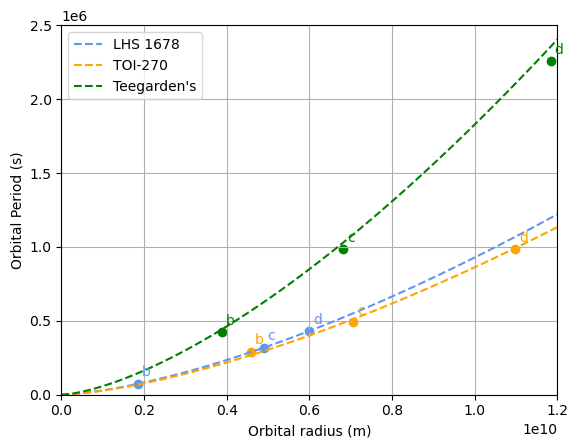

In [8]:
#setting up the figures and axes with appropriate labels
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.set_xlim(0,1.2*10**10)
ax1.set_ylim(0,2.5*10**6)
ax1.set_xlabel("Orbital radius (m)")
ax1.set_ylabel("Orbital Period (s)")
plt.grid()

#setting up values along the x-axis so that i can plot the best fit lines
xvals = np.linspace(0,1.2*10**10,1000)

#setting up some useful variables
x = 0
colours = ["cornflowerblue","orange","green"]

#using a loop to plot the planets for each star system and the best fit line for each star system
while x < nStars:
    ax1.scatter(Rs[x],Ts[x],color = colours[x])
    ax1.plot(xvals,T(Mkg[x],xvals), color = colours[x], label = Stars[x], linestyle = "--")
    
    #setting up a useful variable
    y = 0
    
    #using a nested loop to label each planet with its characteristic letter
    while y < nPlanets[x]:
        currentPlanets = Planets[x]
        currentRs = Rs[x]
        currentTs = Ts[x]
        ax1.annotate(currentPlanets[y], (currentRs[y]+0.01*10**10, currentTs[y]+0.05*10**6), color=colours[x])
        y = y + 1
    
    x = x + 1

#using a legend to show wich star system is which
ax1.legend()

__fig(1)__ In this figure we see each planet plotted with its orbital period __T__ (s) against its orbital radius __R__ (m) with the planets identifying latter labling it and the planets from each star system in a different colour. The dotted lines are the lines that follow Keplers third law, and we can see that as orbital radius increases, the planets fall further bellow this line. I suspect this is due to gravitational interferance of other celestial bodies and also due to fractional amounts of resistance created by astronomical debris and gases.

# Plotting T^2 against R^3

In [9]:
#calculating all R^3 values
R31 = [0 for x in range (nPlanets[0])]
R32 = [0 for x in range (nPlanets[1])]
R33 = [0 for x in range (nPlanets[2])]
R3s = [R31,R32,R33]

#using a loop to calculate the cube of planet orbital radius
x = 0
y = 0
while x < nStars:
    currentR3s = R3s[x]
    currentRs = Rs[x]
    currentR3s[y] = currentRs[y]**3/(10**30)
    if y==2:
        x = x + 1
        y = 0
    else:
        y = y + 1

In [10]:
#calculating all T^2 values
T21 = [0 for x in range (nPlanets[0])]
T22 = [0 for x in range (nPlanets[1])]
T23 = [0 for x in range (nPlanets[2])]
T2s = [T21,T22,T23]

#using a loop to calculate the square of planet orbital period
x = 0
y = 0
while x < nStars:
    currentT2s = T2s[x]
    currentTs = Ts[x]
    currentT2s[y] = currentTs[y]**2/(10**12)
    if y==2:
        x = x + 1
        y = 0
    else:
        y = y + 1

In [11]:
#deffining a function to plot a straight line of best fit
def straightline(m,x,c):
    return m*x+c

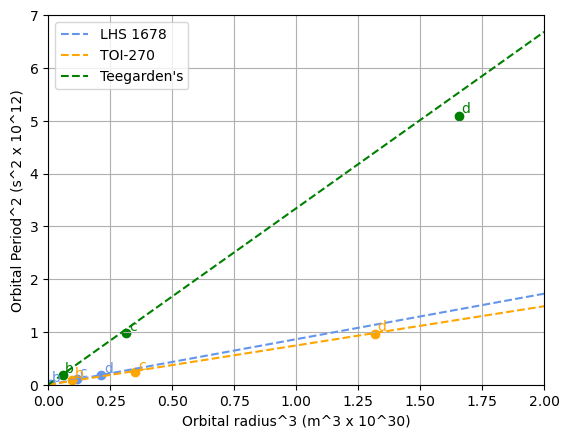

In [12]:
#setting up the figure and axis with appropriate labels
fig2 = plt.figure()
ax2 = fig2.subplots()
#unfortunnately python didnt like it when i set the upper-x-axis limit to 2*10**30 so  ive had to scale the x-axis down by 10**30 and the y-axis down by 10*12. 
#This meant i had to scale the gradient up by 10**(30-12)
ax2.set_xlim(0,2)
ax2.set_ylim(0,7)
ax2.set_xlabel("Orbital radius^3 (m^3 x 10^30)")
ax2.set_ylabel("Orbital Period^2 (s^2 x 10^12)")
plt.grid()

#setting up values along the x-axis so that i can plot the best fit lines
xvals = np.linspace(0,2,1000)

#setting up some useful variables
x = 0
colours = ["cornflowerblue","orange","green"]

#using a loop to plot the planets for each star system and the best fit line for each star system
while x < nStars:
    ax2.scatter(R3s[x],T2s[x],color = colours[x])
    grad = (4*np.pi**2)/(sc.G*Mkg[x])*10**18
    ax2.plot(xvals, straightline(grad,xvals,0),color = colours[x],label=Stars[x], linestyle = "--")
    
    #setting up a useful varibale
    y = 0
    
    #using a nested loop to label each planet with its identifying letter
    while y < nPlanets[x]:
        currentPlanets = Planets[x]
        currentR3s = R3s[x]
        currentT2s = T2s[x]
        ax2.annotate(currentPlanets[y], (currentR3s[y]+0.01, currentT2s[y]+0.05), color=colours[x])
        y = y + 1
    
    x = x + 1

#using a legend to label each star system
ax2.legend()

__fig(2)__ In this figure, we can see a planet plotted with its orbital period squared and orbital radii cubed. Each dotted line is determined by the characteristic equation that dictates the relationship between orbital period, orbital radius and stellar mass: __T^2 = (4*pi)/(G*M)*R^3__ where __T__ is orbital period (seconds), __G__ is the universal gravitational constant (6.67*10^-11 N(m^2)(kg^-2)), __M__ is the stellar mass (kg) and __R__ is the orbital radius (m). As we can see, each planet for its respective star system obey this law, but as planets get further from their star, the relationship diminishes as other celestial bodies interact with them.

# Mass determination from radial velocity

The radial velocity method to determine the mass of an exoplanet is the most commonly used method. Not much data is necessary for this method; only the orbital velocity of the planet, which can be calculated soul from either orbital radius or orbital period, the mass of the star which can be calculated using abstract methods, and the radial velocity of the star. Since both the star and the planet affect each other, the equation V * M = v * m where M is mass of the star, V is the radial velocity of the star, m is the mass of the planet and v is the radial velocity of the planet. This can be rearranged to m = (V * M) / v, such that the mass of the planet is the subject of the equation. Unfortunately, I was only able to obtain a value for the radial velocity of LHS 1678 so I will  only demonstrate determining the mass for each planet from the LHS 1678 system.

# Data Entry: Stellar component radial velocity

In [13]:
#entering the estimated values of radial velocity due to each planet for b, c and d in respective order
Sradvel = [0.082,0.33,0.70]

# Calculating the masses of planets from component radial velocities

In [14]:
#setting up a few useful variables
x = 0
radvel = [0 for x in range (nPlanets[0])]
masses = [0 for x in range (nPlanets[0])]

#using a loop to calculate the masses of the planets from the respective radial velocities
while x < nPlanets[0]:
    radvel[x] = (2*np.pi*(Rs[0])[x])/((Ts[0])[x])
    masses[x] = (Sradvel[x]*Mkg[0])/radvel[x]
    x = x + 1
masses

[3.5909929390940656e+23, 2.351541377797459e+24, 5.480661215588552e+24]

# Plotting calculated masses against "accepted" (previously published) masses

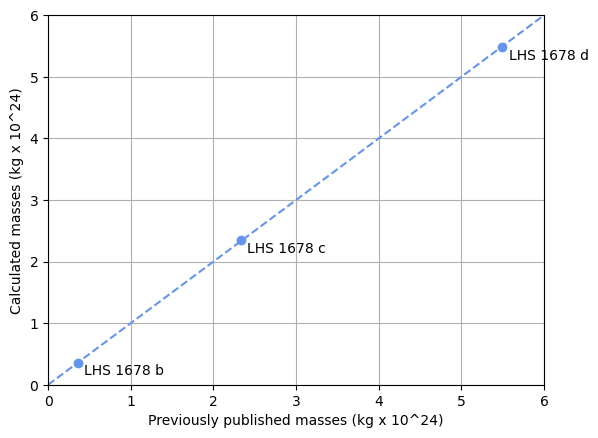

In [15]:
#setting up the figure, putting limits on the axis, and appropriately labling the axis
#matplotlib didnt like it when i tried to set the limits of the axis as 10^25 so ive divided all mass values by 10^24
fig3 = plt.figure()
ax3 = fig3.subplots()
ax3.set_xlim(0,6)
ax3.set_ylim(0,6)
ax3.set_xlabel("Previously published masses (kg x 10^24)")
ax3.set_ylabel("Calculated masses (kg x 10^24)")
plt.grid()

#setting up a few useful variables
xvals = np.linspace(0,6,60)
x = 0
colours = ["cornflowerblue","orange","green"]

#using a loop tto plot the planets with calculated masses against previously published masses
while x < nPlanets[0]:
    currentPlanets = Planets[0]
    mx = (mkgs[0])[x]/(10**24)
    my = masses[x]/(10**24)
    ax3.scatter(mx,my,color = colours[0])
    #annotating each planet with its repective letter
    ax3.annotate(Stars[0]+" "+currentPlanets[x], (mx+0.08,my-0.2))
    x = x + 1

#plotting a diagonal line; this is explained in the footnote
ax3.plot(xvals,xvals,color = colours[0], linestyle = "--")

__fig(3)__ this graph displays the calculated masses __m(kg)__ of each planet (b,c and d) in the LHS 1678 system, against previously published masses __m(kg)__. The black dotted line represents the line upon which a planet falls when the calculated mass of each planet is equal to the previously published masses.

# Plotting the density of each planet against its radii and mass

Taking radii from previously published papers, density of each planet can be calculated and plotted against both mass and radii. Unfortunately, radii for the three planets in the Teegardens system were unavailable so that system shall be excluded from this part of the project.

# Data Entry: Radii of planets

In [16]:
#entering radius data for each planet in each system
LHS1678Radii = [4364135,5995111,6249951]
TOI270Radii = [7944637,14844430,13570230]
Radii = [LHS1678Radii,TOI270Radii]

In [17]:
#setting up some useful variables
x = 0
y = 0
LHS1678densities = [0 for x in range (nPlanets[0])]
TOI270densities = [0 for x in range (nPlanets[1])]
densities = [LHS1678densities,TOI270densities]

#using a loop to look at each star system
while x < len(Radii):
    #setting up some useful variables
    currentdensities = densities[x]
    currentmasses = mkgs
    y = 0
    #using a nested loop to calculate the density of each planet individually
    while y < len(currentdensities):
        currentdensities[y] = (mkgs[x])[y]/(4/3*np.pi*(Radii[x])[y])
        y = y + 1
    x = x + 1

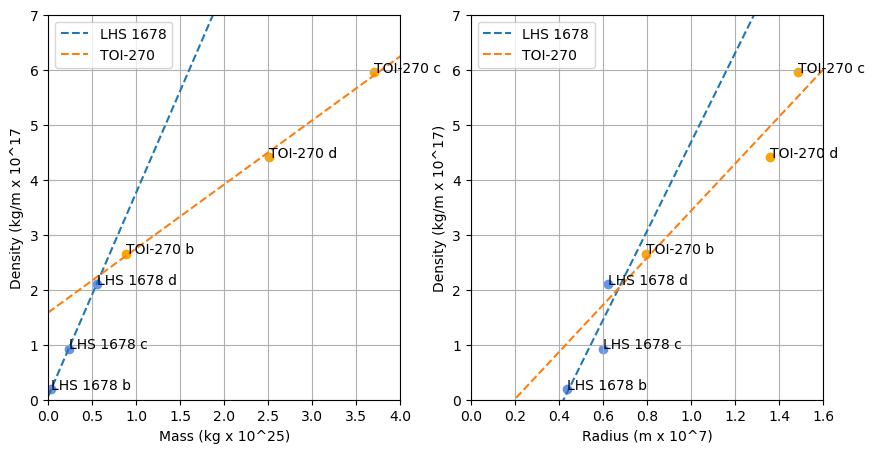

In [18]:
#setting up the multiplot figure so that the two plots are side by side and giving each plot appropriate axis names and limits
fig4,ax4 = plt.subplots(1,2,figsize=(10,5))
ax4[0].set_xlabel("Mass (kg x 10^25)")
ax4[0].set_ylabel("Density (kg/m x 10^17")
ax4[1].set_xlabel("Radius (m x 10^7)")
ax4[1].set_ylabel("Density (kg/m x 10^17)")
ax4[0].set_xlim(0,4)
ax4[0].set_ylim(0,7)
ax4[1].set_xlim(0,1.6)
ax4[1].set_ylim(0,7)
ax4[0].grid()
ax4[1].grid()

#setting up some useful variables
x = 0
y = 0
xvals1 = np.linspace(0,4,40)
colours = ["cornflowerblue","orange","green"]

#using a loop to look at each star system
while x < len(Radii):
    #setting up some useful variables
    y = 0
    currentms = mkgs[x]
    currentrs = Radii[x]
    currentds = densities[x]
    currentplanets = Planets[0]
    mass = 0
    radius = 0
    density = 0
    ms = [0 for x in range (len(currentms))]
    rs = [0 for x in range (len(currentrs))]
    ds = [0 for x in range (len(currentds))]
    #using a nested loop to plot the density of each planet against its mass and radius and annotationg each planet
    while y < len(currentms):
        mass = currentms[y]/(10**25)
        radius = currentrs[y]/(10**7)
        density = currentds[y]/(10**17)
        ms[y] = mass
        rs[y] = radius
        ds[y] = density
        #plotting each planet on each plot and annotating
        ax4[0].scatter(mass,density, color=colours[x])
        ax4[1].scatter(radius,density, color=colours[x])
        ax4[0].annotate(Stars[x]+" "+currentplanets[y],(mass,density))
        ax4[1].annotate(Stars[x]+" "+currentplanets[y],(radius,density))
        y = y + 1
    #plotting best fit lines for each star system on both plots
    m1,c1=np.polyfit(ms,ds,1)
    ax4[0].plot(xvals,m1*xvals+c1, linestyle="--", label=Stars[x])
    m2,c2=np.polyfit(rs,ds,1)
    ax4[1].plot(xvals,m2*xvals+c2, linestyle="--", label=Stars[x])
    #using a legend to show which best fit line represents which star system
    ax4[0].legend()
    ax4[1].legend()
    x = x + 1

__fig(4)__ These two figures display the density __P(kg/m^3)__ of each planet in the LHS 1678 and TOI-270 systems, against their masses __m(kg)__ (left hand figure) and their radii __R(m)__ (right hand figure). Lines of best fit have been plotted for each star system on either graph. As we can see, plotting the density against mass gives much more consistent data where all points fall very close to the same line of best fit, compared to plotting density against radius which produces less consistent data. This suggests the density of a planet is much more dependant on its mass than its radius.

# Plotting surface gravitational field strenght and escape velocity of each planet against their respective masses and radii

Taking radii from previously published papers, surface gravitational field strength and escape velocity of each planet can be calculated and plotted against both mass and radii. Unfortunately, radii for the three planets in the Teegardens system were unavailable so that system shall be excluded from this part of the project.

In [19]:
#setting up some usefull varibales
x = 0
y = 0
LHS1678accs = [0 for x in range (nPlanets[0])]
TOI270accs = [0 for x in range (nPlanets[1])]
accs = [LHS1678accs,TOI270accs]
LHS1678escs = [0 for x in range (nPlanets[0])]
TOI270escs = [0 for x in range (nPlanets[1])]
escs = [LHS1678escs,TOI270escs]

#using a loop to look at each star system
while x < len(accs):
    #setting up some useful variables
    currentas = accs[x]
    currentescs = escs[x]
    currentms = mkgs[x]
    currentrs = Radii[x]
    y = 0
    #using a nested loop to calculate the surface gravitational field strength and escape velocity of each planet
    while y < len(currentas):
        currentas[y] = sc.G*(currentms[y]/(currentrs[y]**2))
        currentescs[y] = (2*sc.G*currentms[y]/currentrs[y])**0.5
        y = y + 1
    x = x + 1

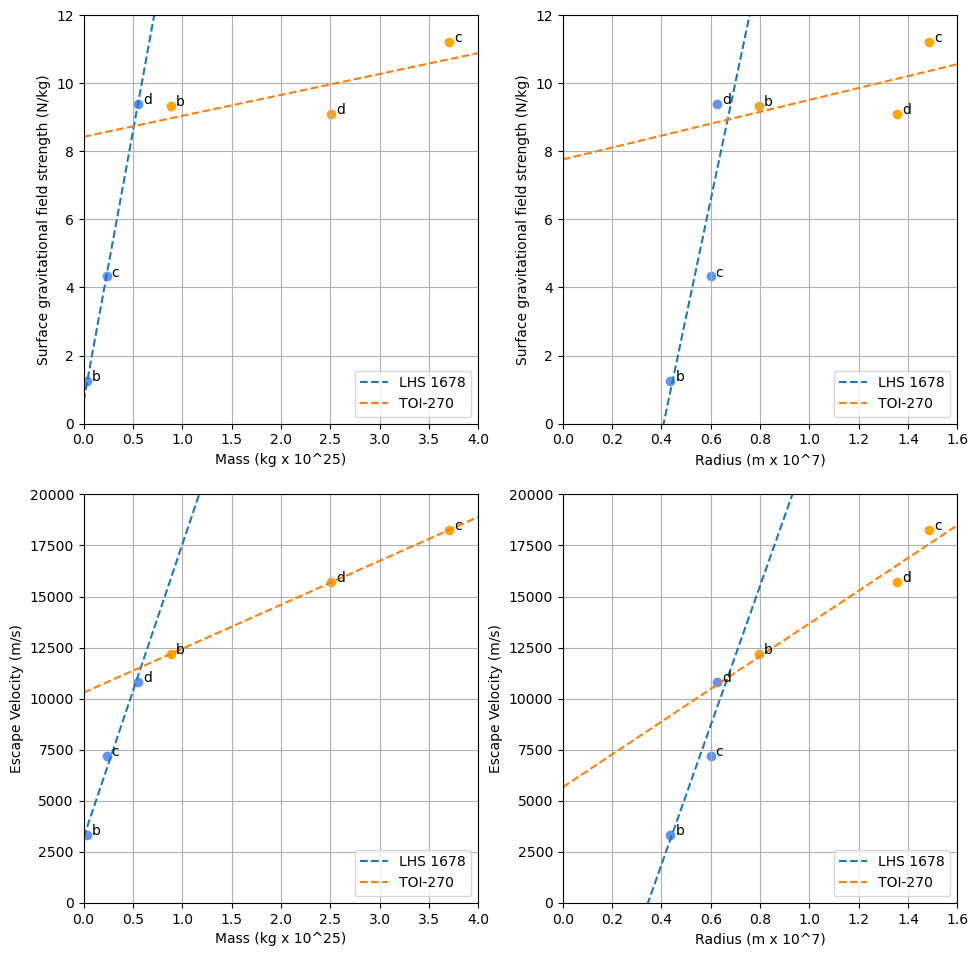

In [20]:
#setting up a 2x2 multifiplot figure and appropriately labling the axis and limitting the axis
fig5,ax5 = plt.subplots(2,2,figsize=(10,10))
fig5.tight_layout(pad=3.0)
ax5[0,0].set_xlabel("Mass (kg x 10^25)")
ax5[0,0].set_ylabel("Surface gravitational field strength (N/kg)")
ax5[0,0].set_xlim(0,4)
ax5[0,0].set_ylim(0,12)
ax5[0,0].grid()
ax5[0,1].set_xlabel("Radius (m x 10^7)")
ax5[0,1].set_ylabel("Surface gravitational field strength (N/kg)")
ax5[0,1].set_xlim(0,1.6)
ax5[0,1].set_ylim(0,12)
ax5[0,1].grid()
ax5[1,0].set_xlabel("Mass (kg x 10^25)")
ax5[1,0].set_ylabel("Escape Velocity (m/s)")
ax5[1,0].set_xlim(0,4)
ax5[1,0].set_ylim(0,20000)
ax5[1,0].grid()
ax5[1,1].set_xlabel("Radius (m x 10^7)")
ax5[1,1].set_ylabel("Escape Velocity (m/s)")
ax5[1,1].set_xlim(0,1.6)
ax5[1,1].set_ylim(0,20000)
ax5[1,1].grid()

#setting up some useful variables
x = 0
y = 0
colours = ["cornflowerblue","orange","green"]

#using a loop to look at each star system
while x < len(accs):
    #setting up some useful variables
    y = 0
    currentms = mkgs[x]
    currentrs = Radii[x]
    currentaccs = accs[x]
    currentescs = escs[x]
    currentplanets = Planets[0]
    mass = 0
    radius = 0
    #using a nested loop to look at each planet individually
    while y < len(currentaccs):
        #appropriately scaling the mass and radius of each planet so that matplotlib doesnt freak out
        mass = currentms[y]/(10**25)
        radius = currentrs[y]/(10**7)
        ms[y] = mass
        rs[y] = radius
        ax5[0,0].scatter(mass,currentaccs[y], color=colours[x])
        ax5[0,0].annotate(currentplanets[y],(mass+0.05,currentaccs[y]))
        ax5[0,1].scatter(radius,currentaccs[y], color=colours[x])
        ax5[0,1].annotate(currentplanets[y],(radius+0.02,currentaccs[y]))
        ax5[1,0].scatter(mass,currentescs[y], color=colours[x])
        ax5[1,0].annotate(currentplanets[y],(mass+0.05,currentescs[y]))
        ax5[1,1].scatter(radius,currentescs[y], color=colours[x])
        ax5[1,1].annotate(currentplanets[y],(radius+0.02,currentescs[y]))
        y = y + 1
    m1,c1=np.polyfit(ms,currentaccs,1)
    ax5[0,0].plot(xvals,m1*xvals+c1, linestyle="--", label=Stars[x])
    m2,c2=np.polyfit(rs,currentaccs,1)
    ax5[0,1].plot(xvals,m2*xvals+c2, linestyle="--", label=Stars[x])
    m3,c3=np.polyfit(ms,currentescs,1)
    ax5[1,0].plot(xvals,m3*xvals+c3, linestyle="--", label=Stars[x])
    m4,c4=np.polyfit(rs,currentescs,1)
    ax5[1,1].plot(xvals,m4*xvals+c4, linestyle="--", label=Stars[x])
    ax5[0,0].legend(loc=4)
    ax5[0,1].legend(loc=4)
    ax5[1,0].legend(loc=4)
    ax5[1,1].legend(loc=4)
    x = x + 1

__fig(5)__ This figure displays four subplots, each with either Surface gravitational field strenght __g(N/kg)__ or Escape velocity __Vesc(m/s)__ on the y-axis plotted against either Mass __m(kg)__ or Radius __R(m)__ on the x-axis. There are lines of best fit plotted for each star system on each graph and each planet is labeled. We can see from the bottom two plots that escape velocity is much more dependant on the mass of the planet as opposed to the radius of the planet. Similarly from the top two plots, it appears as though surface gravitational field strength is slightly more reliant on the mass of the planet too, as opposed to the radius of the planet.

# Plotting a field of gravitational field strength around each star as a scalar field

Taking previously published values of stellar mass __M__, stellar radius __R__ and the formula for gravitational field strength in a radial field __g=(GxM)/(r^2)__ where __r__ is the distance from the centre of the planet, plots of the gravitational field strength can be made for the area surounding each star. Initially I plotted the gravitational field strenght as the colour around each star but unfortunately due to the durastic increase in gravitational field strength as you approach the surface of each star, the gradient was barely visible. For this reason I decided to plot the square-root of the gravitational field around each star so that a more gradiual gradient is produced. 

# Data Entry: Stellar radii

In [21]:
#previously published stellar masses are measured in solar masses therefore a conversiton to kg needs to take place
Sradsun = [0.329,0.38,0.107]
x = 0
#since the stellar masses are so great i will divide all values by 10^7 so they are more appropriate values
Srad1 = [0 for x in range (len(Sradsun))]
Srad2 = [0 for x in range (len(Sradsun))]
while x < len(Sradsun):
    Srad1[x] = Sradsun[x]*696340000
    Srad2[x] = Srad1[x]/(10**7)
    x = x + 1

<BarContainer object of 1 artists>

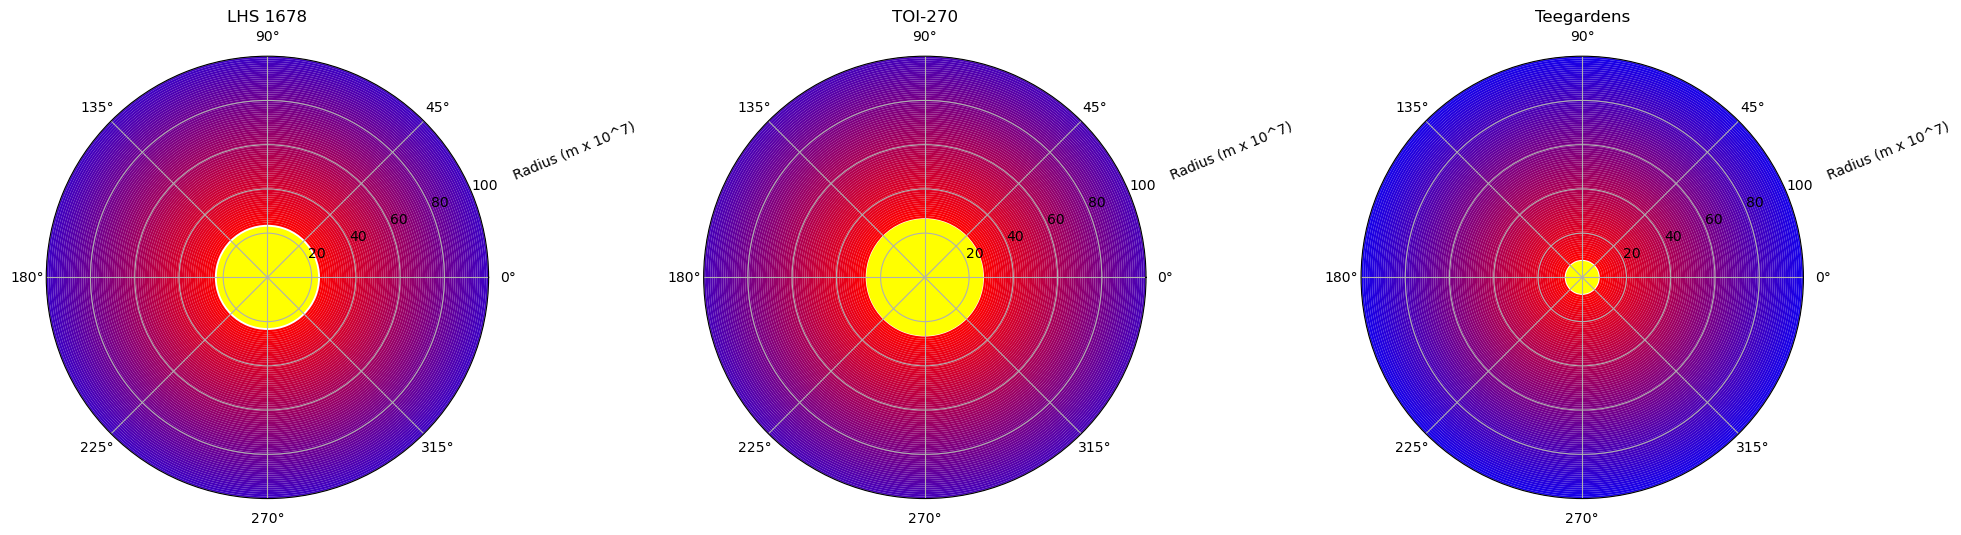

In [22]:
#setting up the figure and 3 subplots, and appropriately labling all axis etc.
fig6= plt.figure(figsize=(20,20))
ax1 = plt.subplot(131, polar=True)
ax2 = plt.subplot(132, polar=True)
ax3 = plt.subplot(133, polar=True)
ax1.title.set_text("LHS 1678")
ax2.title.set_text("TOI-270")
ax3.title.set_text("Teegardens")
ax1.set_rlim(0,100)
ax2.set_rlim(0,100)
ax3.set_rlim(0,100)
label_position=ax1.get_rlabel_position()
ax1.text(np.radians(label_position),ax1.get_rmax()*1.5,'Radius (m x 10^7)',rotation=label_position,ha='center',va='center')
ax2.text(np.radians(label_position),ax2.get_rmax()*1.5,'Radius (m x 10^7)',rotation=label_position,ha='center',va='center')
ax3.text(np.radians(label_position),ax3.get_rmax()*1.5,'Radius (m x 10^7)',rotation=label_position,ha='center',va='center')
fig6.tight_layout(pad=2.0)

#setting up some useful lists
rvals = np.linspace(1,100,101)
theta = rvals*0
width = (rvals/rvals)*2*np.pi

#deffining the colors for each radius value of each plot
colors1 = [0 for x in range (101)]
colors2 = [0 for x in range (101)]
colors3 = [0 for x in range (101)]
colors = [colors1,colors2,colors3]

#using a loop to focus on each subplot/star
x = 0
while x < nStars:
    #setting up a few useful variables
    y = 0
    currentcolors = colors[x]
    #using a nested loop to calculate the colour values for each radius value
    while y < len(rvals):
        red = 1-((rvals[y]-Srad2[x])/100)
        green = rvals[y]*0
        blue = (rvals[y]-Srad2[x])/100
        color = [red,green,blue]
        currentcolors[y] = color
        y = y + 1
    x = x + 1

#using a loop to look at each subplot/star
x = 0
while x < nStars:
    y = 0
    #using a nested loop to plot the different coloured bars on each plot
    while y < len(rvals):
        #using an if statement to not plot any bars where then star will be
        if rvals[y] < Srad2[x]:
            pass
        #using an if statement to plot on the first plot
        elif x==0:
            ax1.bar(theta[y],height=1,width=width[y],bottom=rvals[y],color=(colors[0])[y])
        #using an if statement to plot on the second plot
        elif x==1:
            ax2.bar(theta[y],height=1,width=width[y],bottom=rvals[y],color=(colors[1])[y])
        #using an if statement to plot on the third plot
        elif x==2:
            ax3.bar(theta[y],height=1,width=width[y],bottom=rvals[y],color=(colors[2])[y])
        y = y + 1
    x = x + 1

#plotting the yellow stars in the middle of each subplot
ax1.bar(x=0, height=Srad2[0], width=2*np.pi, bottom=0,color="yellow")
ax2.bar(x=0, height=Srad2[1], width=2*np.pi, bottom=0,color="yellow")
ax3.bar(x=0, height=Srad2[2], width=2*np.pi, bottom=0,color="yellow")

__fig(6)__ This figure depicts the three stars and the square-roots of their gravitational fields surrounding them __g^0.5__ as radius __r__ increases. The yellow circles in the centre of each plot represents each star, and red areas represent areas of greater g^0.5 values while blue represents areas of lesser g^0.5.